# Executive Summary
The price of construction steel for the first six months in 2018 are forecasted. The historical pricing data of steel from 2008 through 2017 were investigated to identify characteristics of the price. A time series forecasting method, SARIMA using AutoARIMA package, was utilized for the prediction as the price shows seasonality. Also, the prices of rebar, glass, concrete, and plywood are investigated.

In addition to the prediction, performed anomaly detection on the price. PCA and K-mean clustering were used to determine the anomalies.

In [2]:
import pandas as pd
import statsmodels.api as sm

In [3]:
Idata=pd.read_csv('construction_material_prices_2008_2018.csv')

In [4]:
Idata.describe()

,price_steel,price_rebar,price_glass,price_concrete,price_plywood
count,2309.000000,1649.000000,1472.000000,1447.000000,2673.000000
mean,12.611319,18.306339,29.997962,26.000636,12.775067
std,6.038862,8.587938,6.524622,7.314764,3.931698
min,3.062500,3.000000,16.000000,10.416667,5.000000
25%,8.500000,12.071429,25.000000,20.559028,10.125000
50%,10.500000,16.500000,29.000000,25.043478,12.125000
75%,14.833333,22.500000,35.000000,30.000000,14.333333
max,41.000000,55.000000,48.000000,50.000000,34.000000


In [5]:
Idata.rename( columns={'Unnamed: 0':'date_time'}, inplace=True )

In [6]:
Idata.describe()
steel = Idata[['date_time','price_steel']]
steel['date_time'] = pd.to_datetime(steel['date_time']) 

rebar = Idata[['date_time','price_rebar']]
rebar['date_time'] = pd.to_datetime(steel['date_time']) 

glass = Idata[['date_time','price_glass']]
glass['date_time'] = pd.to_datetime(steel['date_time']) 

concrete = Idata[['date_time','price_concrete']]
concrete['date_time'] = pd.to_datetime(steel['date_time']) 

plywood = Idata[['date_time','price_plywood']]
plywood['date_time'] = pd.to_datetime(steel['date_time']) 

/Users/jblee/anaconda3/envs/TF_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jblee/anaconda3/envs/TF_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jblee/anaconda3/envs/TF_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [7]:
print("1. raw info steel ")
steel.info()
print(" ")
print("2. raw info rebar ")
rebar.info()
print(" ")
print("3. raw info glass ")
glass.info()
print(" ")
print("4. raw info concrete ")
concrete.info()
print(" ")
print("5. raw info plywood ")
plywood.info()

1. raw info steel 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945 entries, 0 to 2944
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_time    2945 non-null   datetime64[ns]
 1   price_steel  2309 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.1 KB
 
2. raw info rebar 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945 entries, 0 to 2944
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_time    2945 non-null   datetime64[ns]
 1   price_rebar  1649 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.1 KB
 
3. raw info glass 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945 entries, 0 to 2944
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_t

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis
The prices of the materials are plotted. Missing prices are observed. The steel price shows 22% of missing value over the course of the time range of the data collection. The rebar, concrete, glass, and plywood show 44%, 51%, 50%, and 9% of missing values respectively. Decided to fill the prices based on interpolation.

Text(0.5, 1.0, 'steel')

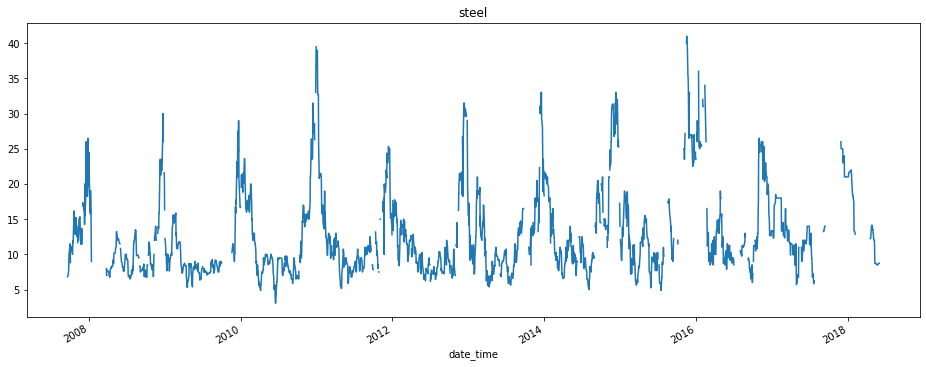

In [9]:
steel.set_index('date_time')['price_steel'].plot(figsize=(16,6))
plt.title("steel")

Text(0.5, 1.0, 'rebar')

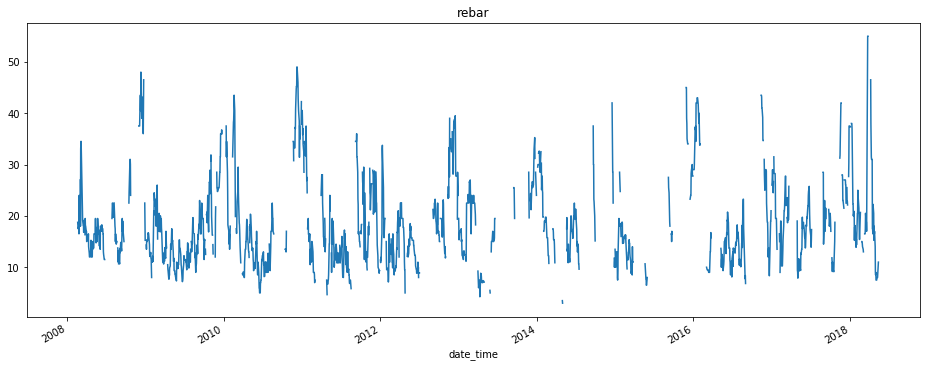

In [10]:
rebar.set_index('date_time')['price_rebar'].plot(figsize=(16,6))
plt.title("rebar")

Text(0.5, 1.0, 'concrete')

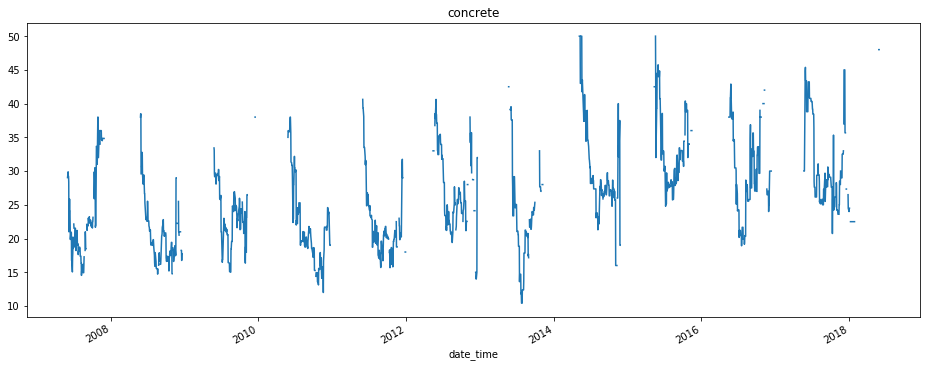

In [11]:
concrete.set_index('date_time')['price_concrete'].plot(figsize=(16,6))
plt.title("concrete")

Text(0.5, 1.0, 'glass')

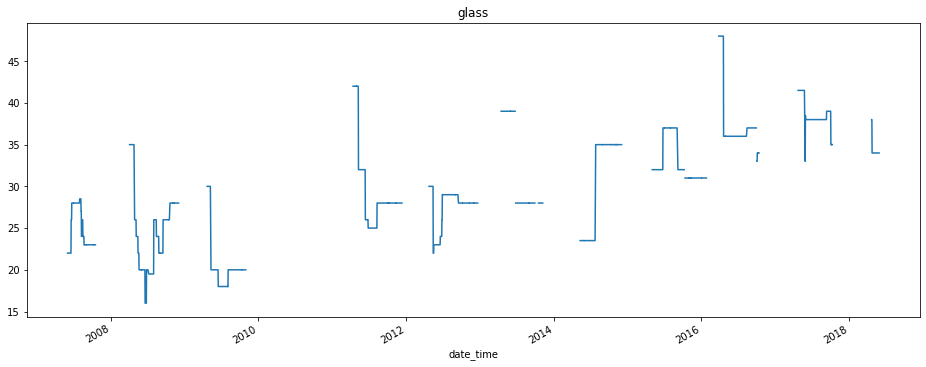

In [12]:
glass.set_index('date_time')['price_glass'].plot(figsize=(16,6))
plt.title('glass')

Text(0.5, 1.0, 'plywood')

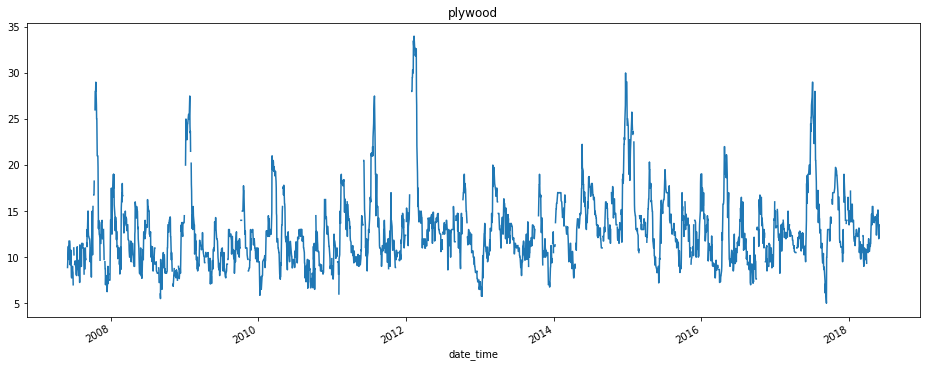

In [13]:
plywood.set_index('date_time')['price_plywood'].plot(figsize=(16,6))
plt.title('plywood')

In [14]:
total_days_steel = steel['date_time'].size
count_null_days_steel = steel['price_steel'].isna().sum()
count_null_days_rebar = rebar['price_rebar'].isna().sum()
count_null_days_concrete = concrete['price_concrete'].isna().sum()
count_null_days_glass = glass['price_glass'].isna().sum()
count_null_days_plywood = plywood['price_plywood'].isna().sum()

In [15]:
print("percentage of missing steel price : ", round(count_null_days_steel/total_days_steel,2))
print("percentage of missing rebar price : ", round(count_null_days_rebar/total_days_steel,2))
print("percentage of missing concrete price : ", round(count_null_days_concrete/total_days_steel,2))
print("percentage of missing glass price : ", round(count_null_days_glass/total_days_steel,2))
print("percentage of missing plywood price : ", round(count_null_days_plywood/total_days_steel,2))

percentage of missing steel price :  0.22
percentage of missing rebar price :  0.44
percentage of missing concrete price :  0.51
percentage of missing glass price :  0.5
percentage of missing plywood price :  0.09


In [16]:
steel_filled = steel.interpolate()
rebar_filled = rebar.interpolate()
concrete_filled = concrete.interpolate()
glass_filled = glass.interpolate()
plywood_filled = plywood.interpolate()

Text(0.5, 1.0, 'steel')

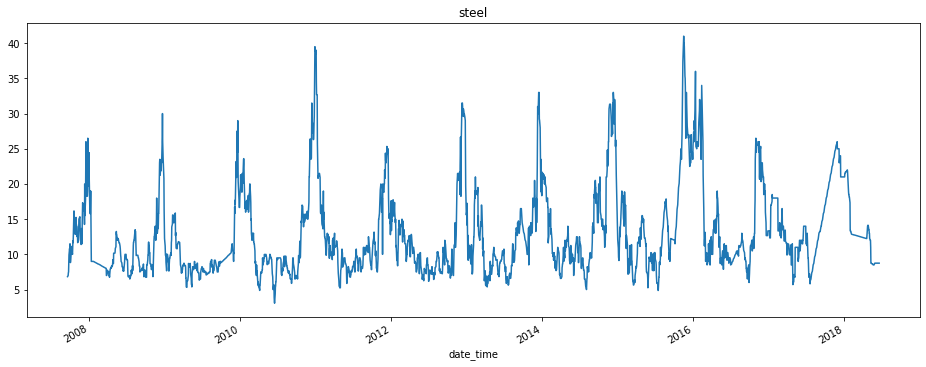

In [17]:
steel_filled.set_index('date_time')['price_steel'].plot(figsize=(16,6))
plt.title('steel')

Text(0.5, 1.0, 'rebar')

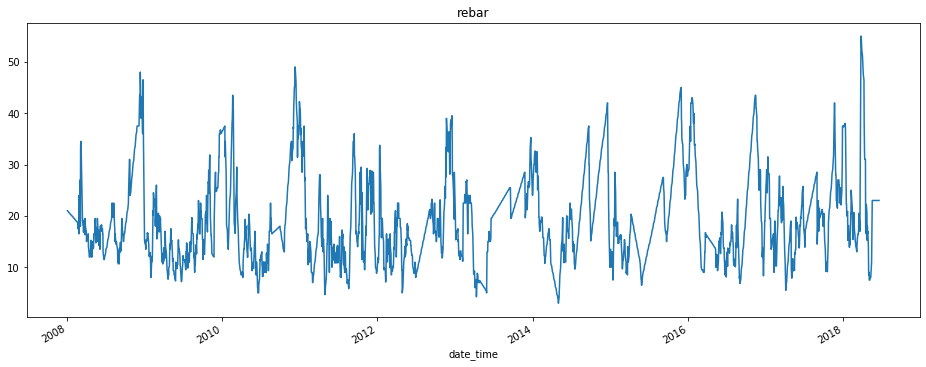

In [18]:
rebar_filled.set_index('date_time')['price_rebar'].plot(figsize=(16,6))
plt.title('rebar')

Text(0.5, 1.0, 'concrete')

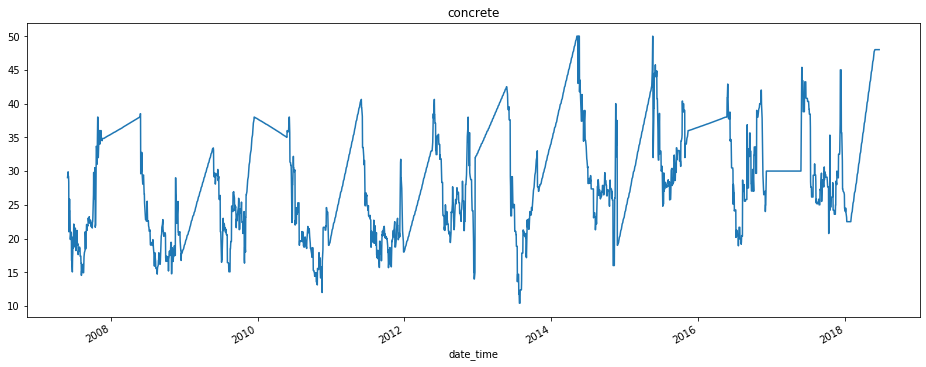

In [19]:
concrete_filled.set_index('date_time')['price_concrete'].plot(figsize=(16,6))
plt.title('concrete')

Text(0.5, 1.0, 'glass')

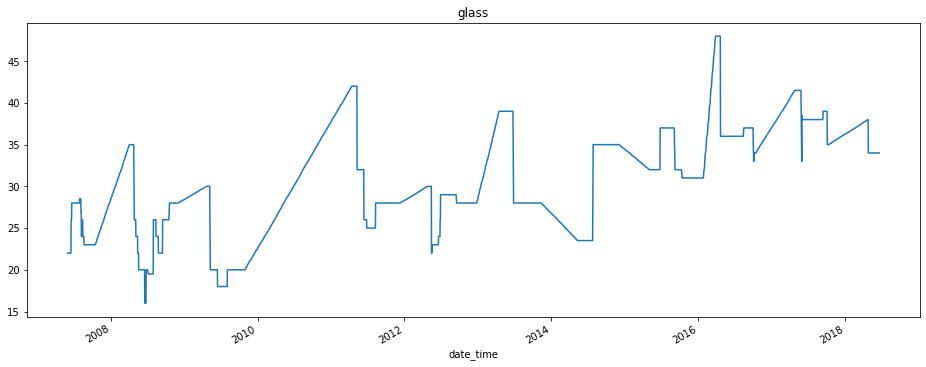

In [20]:
glass_filled.set_index('date_time')['price_glass'].plot(figsize=(16,6))
plt.title('glass')

Text(0.5, 1.0, 'plywood')

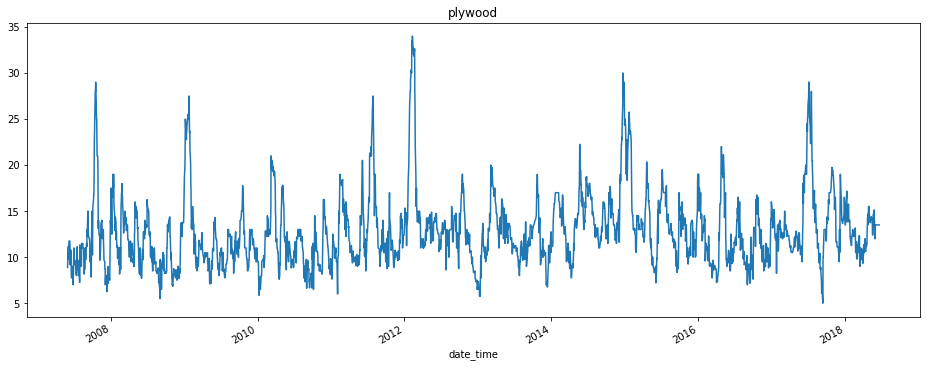

In [21]:
plywood_filled.set_index('date_time')['price_plywood'].plot(figsize=(16,6))
plt.title('plywood')

In [22]:
steel_filled = steel_filled.set_index('date_time')
rebar_filled = rebar_filled.set_index('date_time')
concrete_filled = concrete_filled.set_index('date_time')
glass_filled = glass_filled.set_index('date_time')
plywood_filled = plywood_filled.set_index('date_time')

In [23]:
steel_filled.index

DatetimeIndex(['2007-01-01', '2007-01-03', '2007-01-04', '2007-01-05',
               '2007-01-08', '2007-01-09', '2007-01-10', '2007-01-11',
               '2007-01-12', '2007-01-16',
               ...
               '2018-06-06', '2018-06-07', '2018-06-08', '2018-06-11',
               '2018-06-12', '2018-06-13', '2018-06-14', '2018-06-15',
               '2018-06-18', '2018-06-19'],
              dtype='datetime64[ns]', name='date_time', length=2945, freq=None)

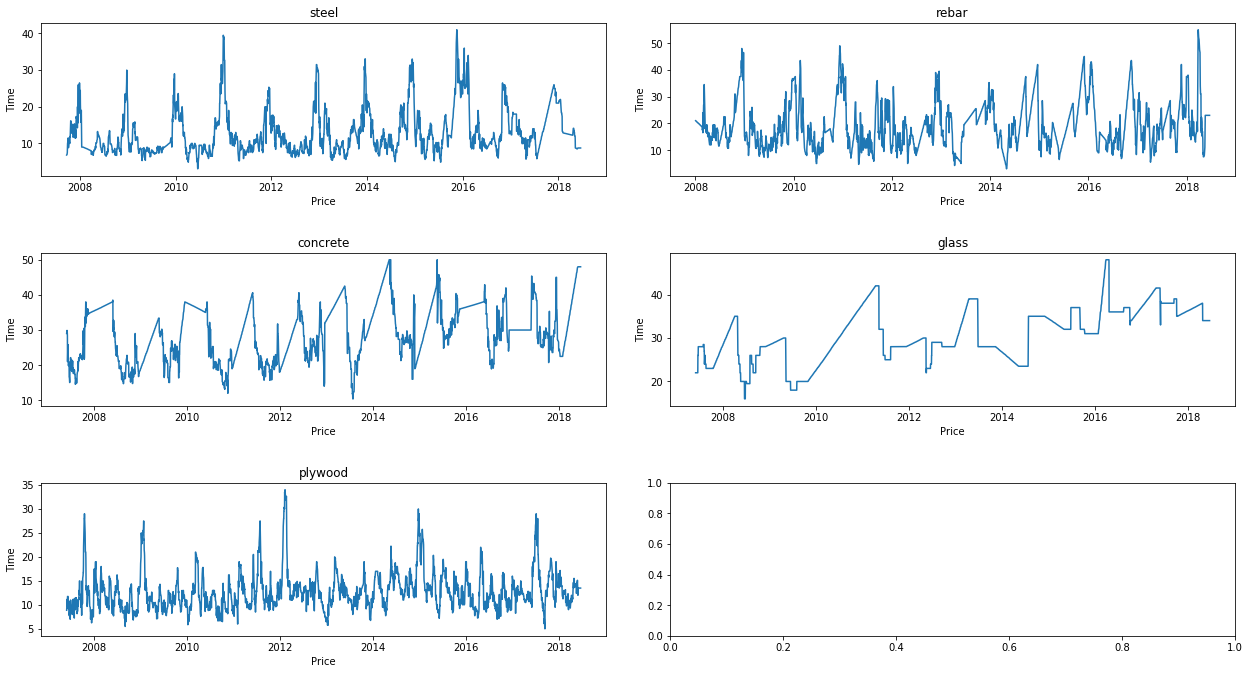

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))

steel_filled_index = steel_filled.reset_index()
rebar_filled_index = rebar_filled.reset_index()
concrete_filled_index = concrete_filled.reset_index()
glass_filled_index = glass_filled.reset_index()
plywood_filled_index = plywood_filled.reset_index()

# plot time signal:
axes[0, 0].set_title("steel")
axes[0, 0].plot(steel_filled_index['date_time'], steel_filled_index['price_steel'], color='C0')
axes[0, 0].set_xlabel("Price")
axes[0, 0].set_ylabel("Time")

axes[0, 1].set_title("rebar")
axes[0, 1].plot(rebar_filled_index['date_time'], rebar_filled_index['price_rebar'], color='C0')
axes[0, 1].set_xlabel("Price")
axes[0, 1].set_ylabel("Time")

axes[1, 0].set_title("concrete")
axes[1, 0].plot(concrete_filled_index['date_time'], concrete_filled_index['price_concrete'], color='C0')
axes[1, 0].set_xlabel("Price")
axes[1, 0].set_ylabel("Time")

axes[1, 1].set_title("glass")
axes[1, 1].plot(glass_filled_index['date_time'], glass_filled_index['price_glass'], color='C0')
axes[1, 1].set_xlabel("Price")
axes[1, 1].set_ylabel("Time")

axes[2, 0].set_title("plywood")
axes[2, 0].plot(plywood_filled_index['date_time'], plywood_filled_index['price_plywood'], color='C0')
axes[2, 0].set_xlabel("Price")
axes[2, 0].set_ylabel("Time")


fig.tight_layout(pad=3.0)

# steel_filled.loc['2008'].plot()

# Trend, Seasonality, Noise
Overall trend, seasonality, errors are evaluated. The steel price shows increasing trend over the course of the 10 years. Also, in summer, the price tends to show the lowest price of the year while sharp price increases are observed at the beginning and end of the years.

In [25]:
steel_filled_drop = steel_filled.dropna()
steel_MS = steel_filled_drop['price_steel'].resample('MS').mean()

rebar_filled_drop = rebar_filled.dropna()
rebar_MS = rebar_filled_drop['price_rebar'].resample('MS').mean()

concrete_filled_drop = concrete_filled.dropna()
concrete_MS = concrete_filled_drop['price_concrete'].resample('MS').mean()

glass_filled_drop = glass_filled.dropna()
glass_MS = glass_filled_drop['price_glass'].resample('MS').mean()

plywood_filled_drop = plywood_filled.dropna()
plywood_MS = plywood_filled_drop['price_plywood'].resample('MS').mean()

In [26]:
steel_MS = steel_MS.to_frame()
rebar_MS = rebar_MS.to_frame()
concrete_MS = concrete_MS.to_frame()
glass_MS = glass_MS.to_frame()
plywood_MS = plywood_MS.to_frame()

In [27]:
steel_decompose=sm.tsa.seasonal_decompose(steel_MS['price_steel'])
rebar_decompose=sm.tsa.seasonal_decompose(rebar_MS['price_rebar'])
concrete_decompose=sm.tsa.seasonal_decompose(concrete_MS['price_concrete'])
glass_decompose=sm.tsa.seasonal_decompose(glass_MS['price_glass'])
plywood_decompose=sm.tsa.seasonal_decompose(plywood_MS['price_plywood'])

In [28]:
def decompose(decomp, commo):
    trend = decomp.trend
    seasonal = decomp.seasonal
    residue = decomp.resid

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 10))
    axes[0].set_title(commo+" price")
    axes[0].plot(trend, color='C0')
    axes[0].set_ylabel("Trend")

    axes[1].plot(seasonal, color='C0')
    axes[1].set_ylabel("Seasonality")

    axes[2].plot(residue, color='C0')
    axes[2].set_ylabel("Residual")

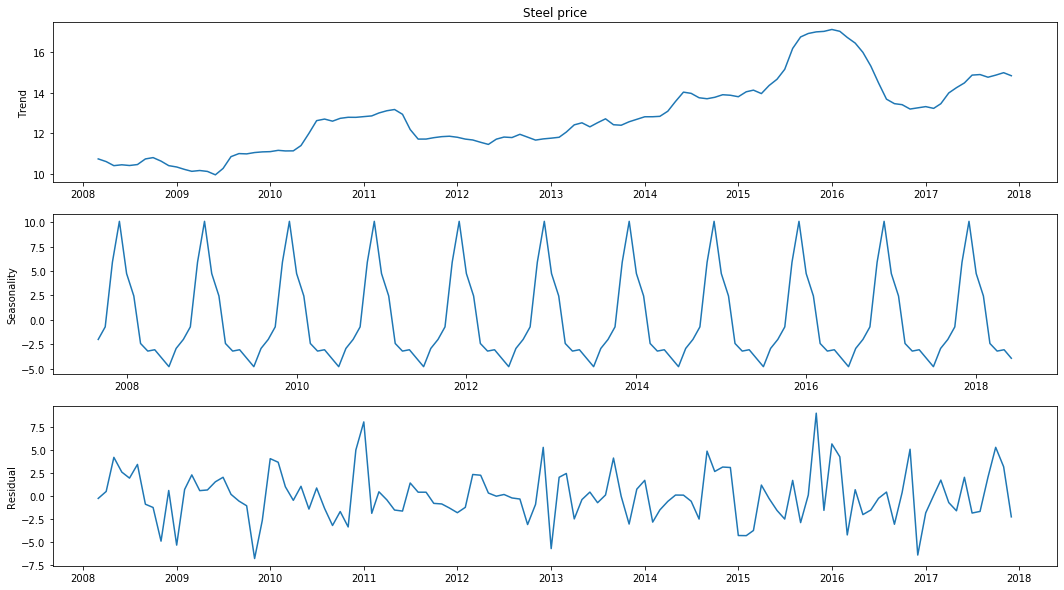

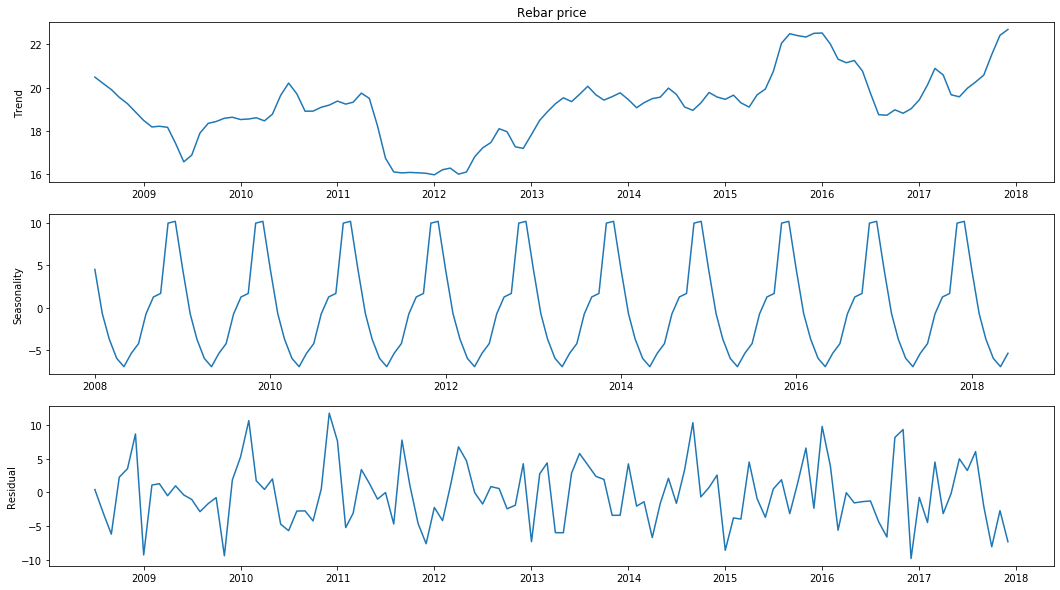

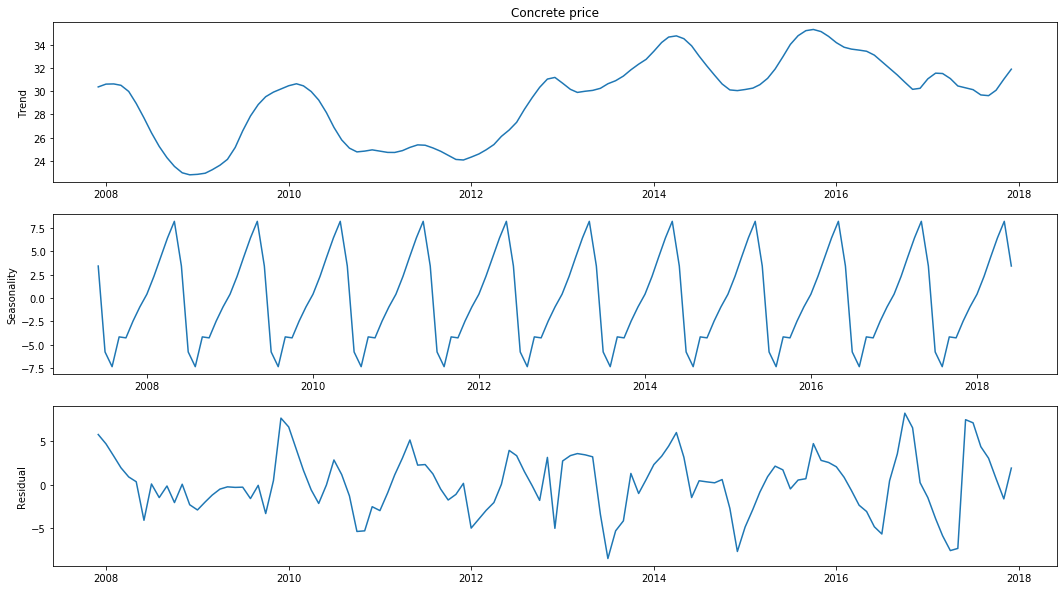

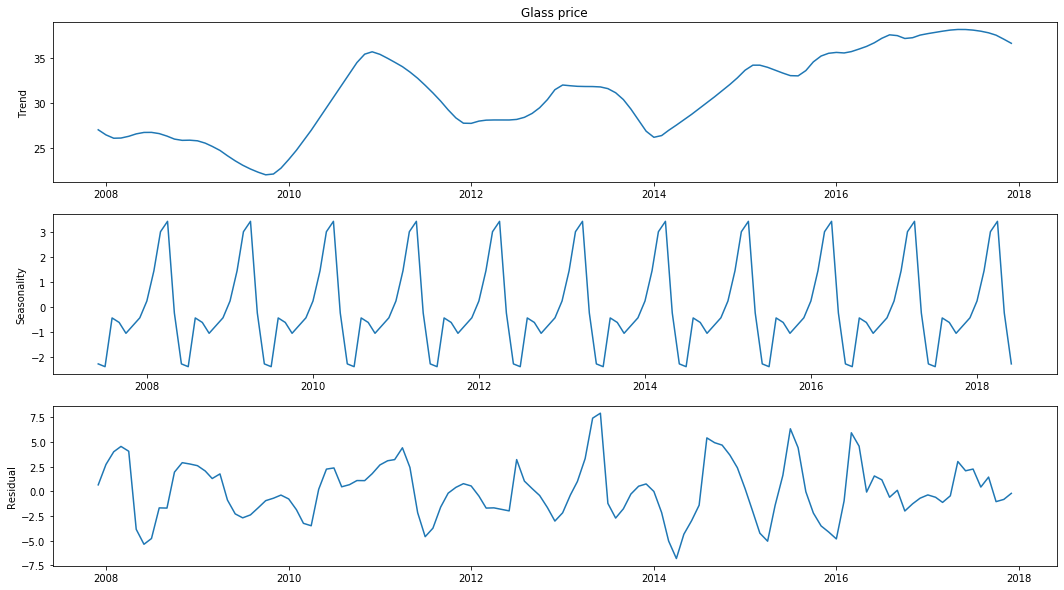

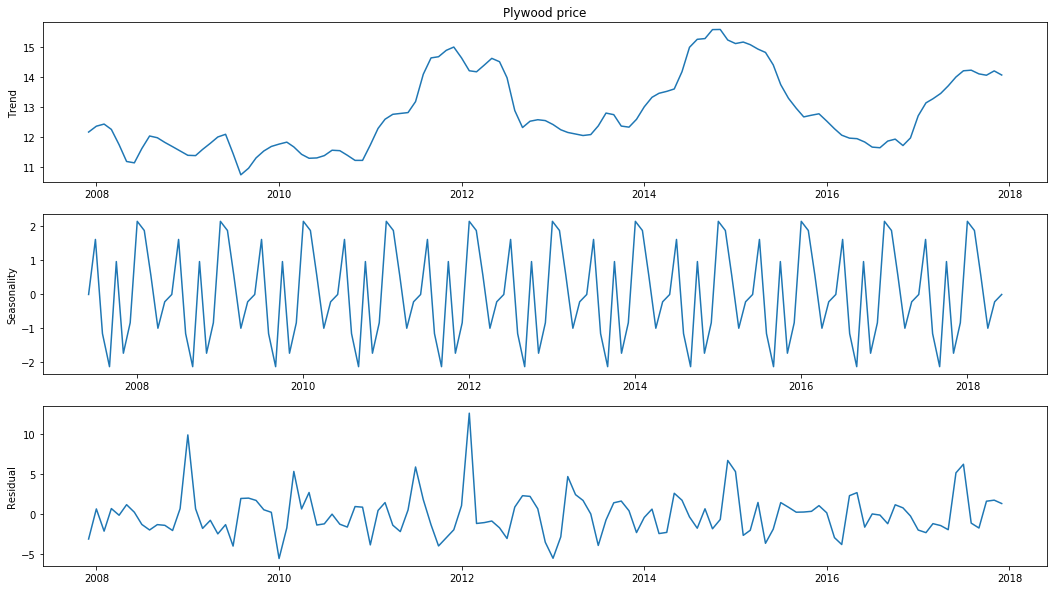

In [29]:
decompose(steel_decompose, "Steel")
decompose(rebar_decompose, "Rebar")
decompose(concrete_decompose, "Concrete")
decompose(glass_decompose, "Glass")
decompose(plywood_decompose, "Plywood")

# Apply SARIMA and forecast the steel price 
The noise values follow normal distribution and no strong auto-correlation is observed. Also, achieved Mean Absolute Error of 1.20 which is about 10% of the mean steel price over the course of the predicted 6 month.

In [30]:
import pmdarima as pm
def auto_arima_func(idata):
    arima = pm.auto_arima(idata[:'2017'], start_p=0, start_q=0, d=0, max_p=4, max_q=4, suppress_warnings=True,
                      stepwise=True, error_action='ignore', m=12)
    return arima

In [31]:
# steel_filled_drop[:'2017']
# steel_MS[:'2017']
steel_arima = auto_arima_func(steel_MS)

In [32]:
steel_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  124
Model:             SARIMAX(4, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -326.425
Date:                              Tue, 07 Apr 2020   AIC                            668.851
Time:                                      14:58:43   BIC                            691.413
Sample:                                           0   HQIC                           678.016
                                              - 124                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6224      0.472      1.318      0.188      -0.303       1.548
ar.L1          0.3762      0.085      4.415      0.000       0.209       0.543
ar.L2         -0.0253      0.071     -0.353      0.724      -0.165       0.115
ar.L3          0.2436      0.106      2.302      0.021       0.036       0.451
ar.L4         -0.1753      0.137     -1.280      0.200      -0.444       0.093
ar.S.L12       0.9160      0.053     17.413      0.000       0.813       1.019
ma.S.L12      -0.5376      0.122     -4.410      0.000      -0.777      -0.299
sigma2        10.4363      1.269      8.227      0.000       7.950      12.923
===================================================================================
Ljung-Box (Q):                       29.31   Jarque-Bera (JB):                22.11
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             0.85
Prob(H) (two-sided):                  0.21   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

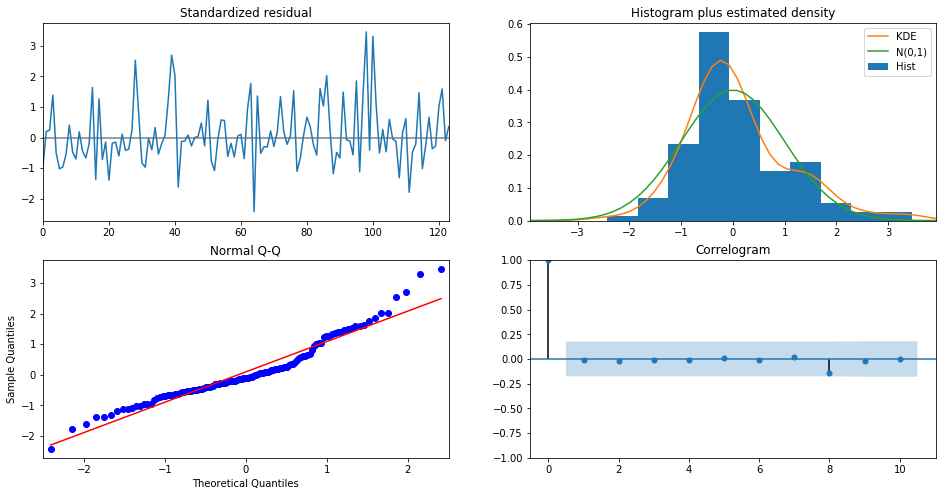

In [33]:
steel_arima.plot_diagnostics(figsize=(16, 8))
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
pred, conf_int = steel_arima.predict(n_periods=6, return_conf_int=True)
print("Mean Squared Error : ", np.sqrt(mean_squared_error(steel_MS['2018':], pred)))

Mean Squared Error :  1.8233324766719599


In [37]:
pred, conf_int = steel_arima.predict(n_periods=6, return_conf_int=True)
print("Mean Absolute Error : ", np.sqrt(mean_absolute_error(steel_MS['2018':], pred)))

Mean Absolute Error :  1.2044157624779712


In [60]:
steel_MS['2018':].describe()

,price_steel,Year,Month,cluster,principal_feature1,principal_feature2,anomaly1
count,6.000000,6.0,6.000000,6.0,6.000000,6.000000,6.000000
mean,12.754554,2018.0,3.500000,0.0,0.263522,1.732308,0.166667
std,3.854434,0.0,1.870829,0.0,0.293052,0.360874,0.408248
min,8.750000,2018.0,1.000000,0.0,0.074247,1.252923,0.000000
25%,10.509498,2018.0,2.250000,0.0,0.086631,1.491738,0.000000
50%,12.657826,2018.0,3.500000,0.0,0.132271,1.731844,0.000000
75%,12.814481,2018.0,4.750000,0.0,0.289553,1.962393,0.000000
max,19.801587,2018.0,6.000000,0.0,0.828945,2.226290,1.000000


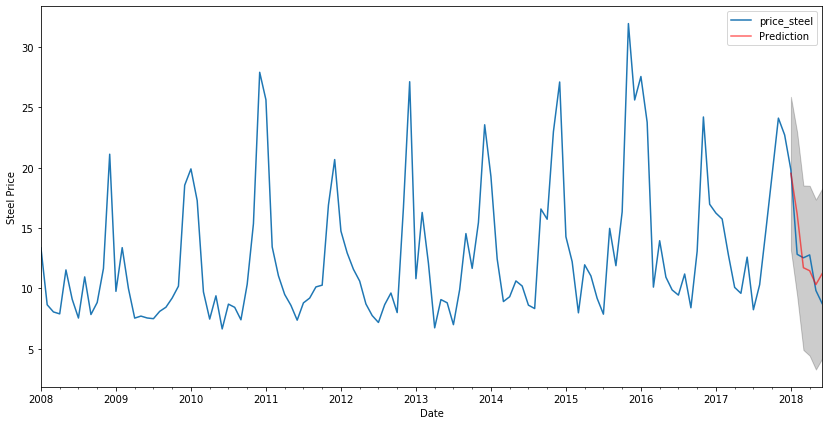

In [39]:
pred_DF = pd.DataFrame(pred, index = steel_MS['2018':].index, columns=['Prediction'])
ax = steel_MS['2008':].plot(label='observed')

pred_DF.plot(ax=ax, label='One-step ahead Forecast', alpha=.6, figsize=(14, 7), color='r')
ax.fill_between(pred_DF.index,
                conf_int[:, 0],
                conf_int[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Steel Price')
plt.legend()
plt.show()

# Clustering data based on year, month, and the steel price

In [40]:
from sklearn.cluster import KMeans

In [41]:
steel_MS['Year'] = steel_MS.index.year
steel_MS['Month'] = steel_MS.index.month

In [42]:
steel_MS

,price_steel,Year,Month
date_time,,,
2007-09-01,7.937500,2007,9
2007-10-01,11.937047,2007,10
2007-11-01,13.376190,2007,11
2007-12-01,18.361111,2007,12
2008-01-01,13.355337,2008,1
...,...,...,...
2018-02-01,12.826754,2018,2
2018-03-01,12.537990,2018,3
2018-04-01,12.777661,2018,4


In [43]:
steel_MS_kmean = steel_MS

Text(0, 0.5, 'Month')

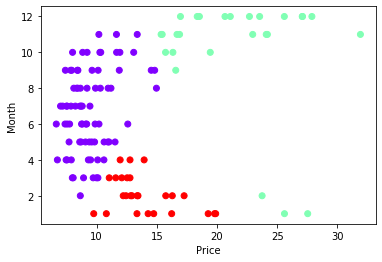

In [44]:
X = steel_MS[['price_steel','Month']]
km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)
labels = km.labels_
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Price')
plt.ylabel('Month')

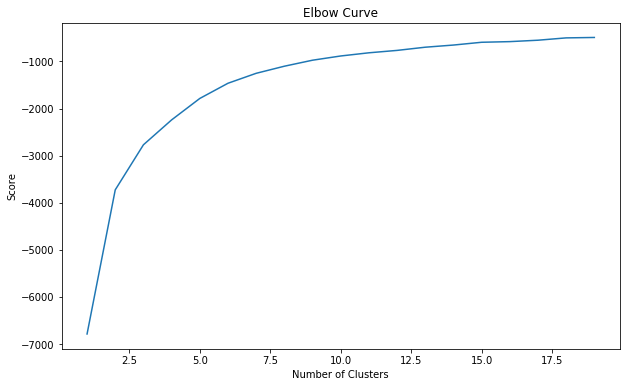

In [45]:
data = steel_MS[['price_steel','Month','Year']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

In [46]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope

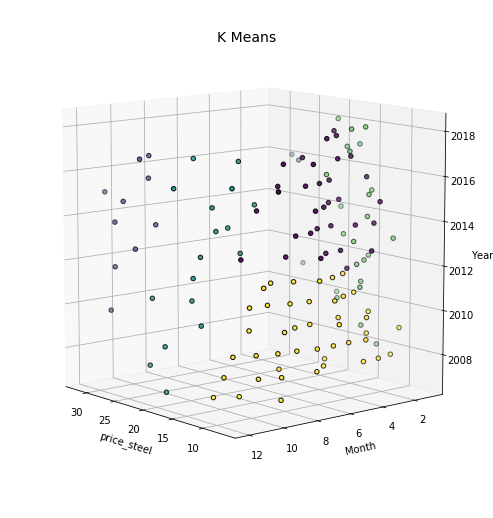

In [47]:
X = steel_MS[['price_steel','Month','Year']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=5)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=10, azim=140)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("price_steel")
ax.set_ylabel("Month")
ax.set_zlabel("Year")
plt.title("K Means", fontsize=14);

# Principal Component Analysis
Produce pricipal components and reduce the dimensionality

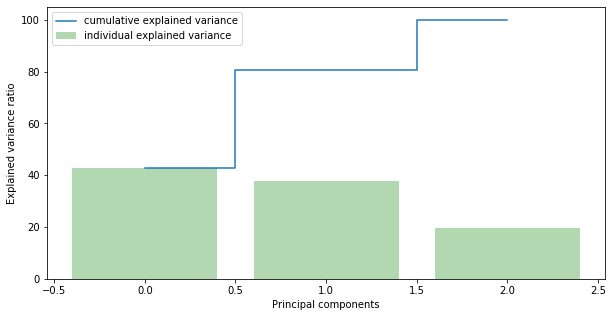

In [48]:
data = steel_MS[['price_steel','Month','Year']]
X = data.values
X_std = StandardScaler().fit_transform(X)

mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [49]:
data = pd.DataFrame(X_std)
# reduce to 2 important features
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [50]:
# standardize these 2 new features
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

# Clustering based on the pricipal companents

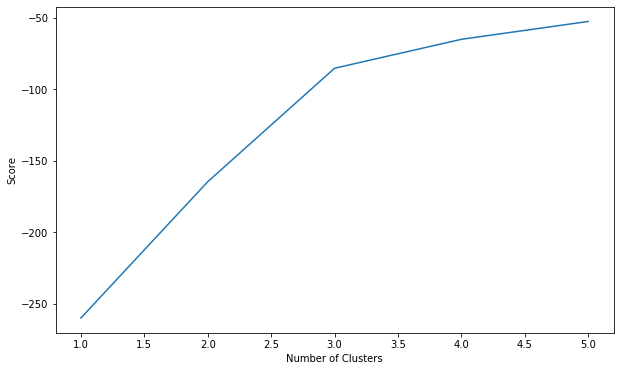

In [51]:
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 6)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show();

In [52]:
# calculate with different number of centroids to see the loss plot (elbow method)
# n_cluster = range(1, 20)
data.index = steel_MS.index
temp = steel_MS
temp['cluster'] = kmeans[2].predict(data)
temp['principal_feature1'] = data[0]
temp['principal_feature2'] = data[1]
temp['cluster'].value_counts()

0    53
1    52
2    25
Name: cluster, dtype: int64

In [53]:
temp

,price_steel,Year,Month,cluster,principal_feature1,principal_feature2
date_time,,,,,,
2007-09-01,7.937500,2007,9,1,-0.946914,-1.706435
2007-10-01,11.937047,2007,10,1,-0.330115,-1.871314
2007-11-01,13.376190,2007,11,1,-0.029863,-2.048478
2007-12-01,18.361111,2007,12,2,0.708760,-2.208629
2008-01-01,13.355337,2008,1,1,-1.138647,0.010585
...,...,...,...,...,...,...
2018-02-01,12.826754,2018,2,0,0.088958,2.008757
2018-03-01,12.537990,2018,3,0,0.175584,1.823303
2018-04-01,12.777661,2018,4,0,0.327542,1.640384


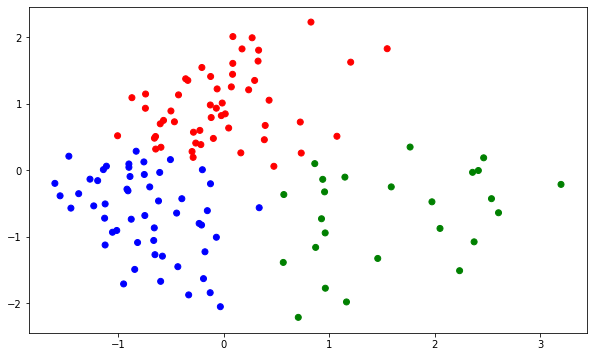

In [54]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey'}
ax.scatter(temp['principal_feature1'], temp['principal_feature2'], c=temp["cluster"].apply(lambda x: colors[x]))
plt.show();

# Find anomlies based on the distance to nearest centroid. The price presents largest distance are considered as anomaly

In [55]:
idata = temp[['principal_feature1','principal_feature2','cluster']]

def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in data.index:
        Xa = np.array(data[['principal_feature1','principal_feature2']].loc[i])
        Xb = model.cluster_centers_[data[['cluster']].loc[i]]
        distance.at[i]= np.linalg.norm(Xa-Xb)
    return distance
outliers_fraction = 0.05
# # get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(idata, kmeans[2])

number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
temp['anomaly1'] = (distance >= threshold).astype(int)

/Users/jblee/anaconda3/envs/TF_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [56]:
temp[temp['anomaly1']==1]

,price_steel,Year,Month,cluster,principal_feature1,principal_feature2,anomaly1
date_time,,,,,,,
2007-11-01,13.376190,2007,11,1,-0.029863,-2.048478,1
2007-12-01,18.361111,2007,12,2,0.708760,-2.208629,1
2015-11-01,31.919913,2015,11,2,3.199240,-0.211684,1
2016-01-01,27.539583,2016,1,0,1.551485,1.826462,1
2016-02-01,23.751667,2016,2,0,1.205503,1.624219,1
2018-01-01,19.801587,2018,1,0,0.828945,2.226290,1


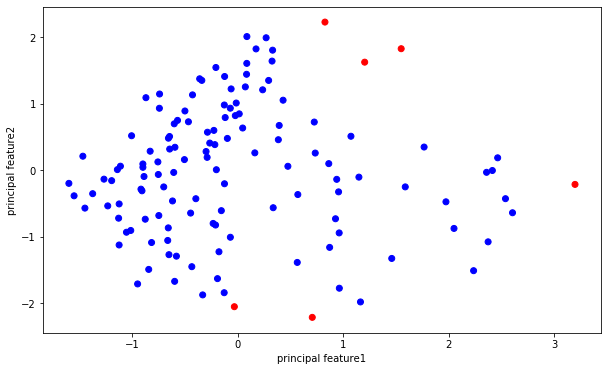

In [57]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(steel_MS['principal_feature1'], steel_MS['principal_feature2'], c=steel_MS["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

# Show the steel price anomalies on the time-series plot

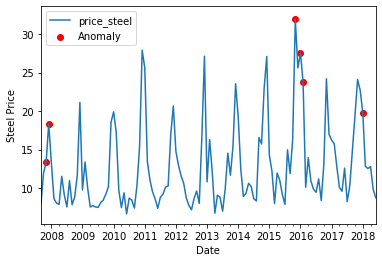

In [58]:
steel_temp = temp

steel_DF = pd.DataFrame(steel_temp, index = steel_temp.index, columns=['price_steel'])
ax = steel_temp['price_steel'].plot()

steel_temp_anomaly = steel_temp[steel_temp['anomaly1']==1]
ax.scatter(steel_temp_anomaly.index, steel_temp_anomaly['price_steel'], color='red', label='Anomaly')

ax.set_xlabel('Date')
ax.set_ylabel('Steel Price')
plt.legend()
plt.show()